In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import seaborn as sns


In [13]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
nan_in_df = df.isnull().sum().any()
nan_in_df

False

In [15]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

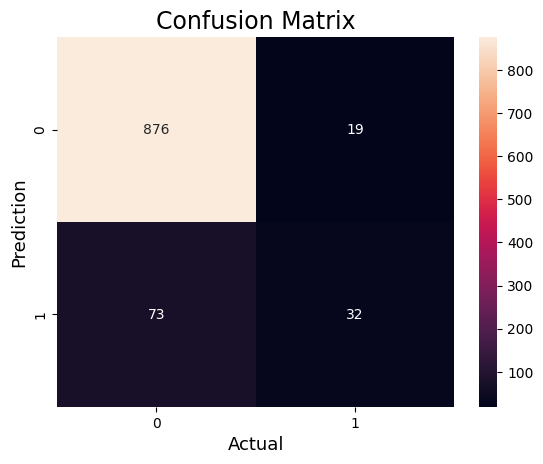

In [19]:
cm = confusion_matrix(y_test, y_pred_logistic)

sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [20]:
print("Accuracy: ", accuracy_score(y_test, y_pred_logistic))
print("Precision: ", precision_score(y_test, y_pred_logistic))
print("Recall: ", recall_score(y_test, y_pred_logistic))
print("F1 score: ", f1_score(y_test, y_pred_logistic))

Accuracy:  0.908
Precision:  0.6274509803921569
Recall:  0.3047619047619048
F1 score:  0.4102564102564103


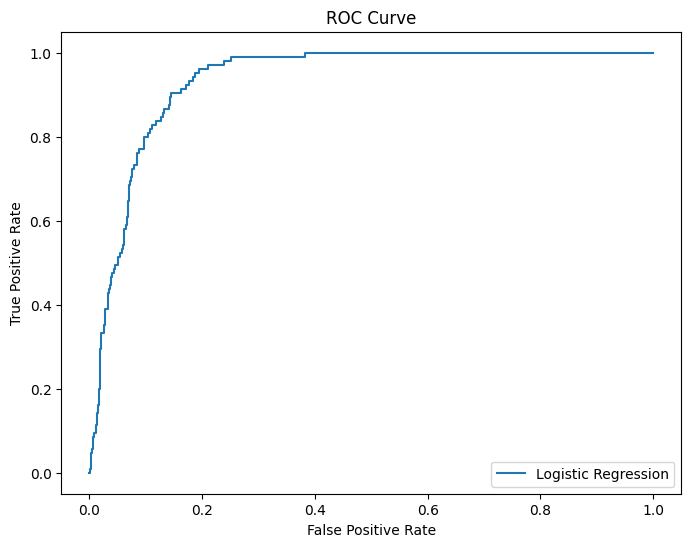

In [21]:
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [22]:
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)
roc_auc_logistic

0.9345570630486832

In [23]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

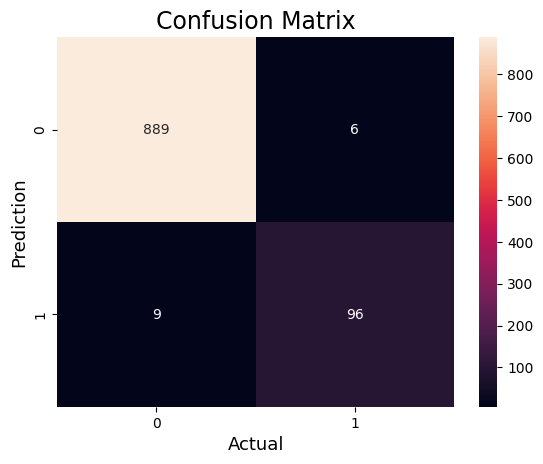

In [24]:
cm1 = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(cm1, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [25]:
print("Accuracy: ", accuracy_score(y_test, y_pred_decision_tree))
print("Precision: ", precision_score(y_test, y_pred_decision_tree))
print("Recall: ", recall_score(y_test, y_pred_decision_tree))
print("F1 score: ", f1_score(y_test, y_pred_decision_tree))

Accuracy:  0.985
Precision:  0.9411764705882353
Recall:  0.9142857142857143
F1 score:  0.9275362318840579


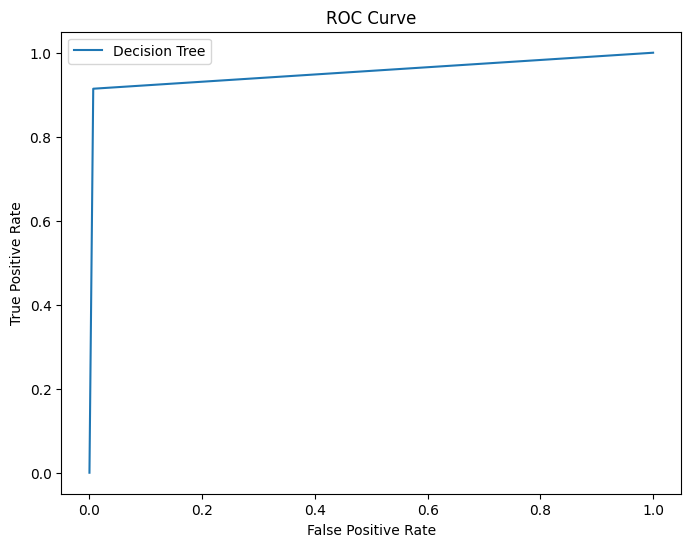

In [26]:
y_proba_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_proba_decision_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [27]:
roc_auc_decision_tree = roc_auc_score(y_test, y_proba_decision_tree)
roc_auc_decision_tree

0.9537909018355946